# Regression Analysis

In [469]:
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')
sns.set_context('poster', rc={"lines.linewidth": 2} )

%matplotlib inline

In [664]:
def gen_regression_problem(N, Vx, Ve, alpha, beta, mu=0, positive=False ):

    X = np.random.uniform(-Vx + mu, Vx + mu, N )
    E = np.random.normal(0, Ve, N )
    
    Y  = [ alpha + beta*x + e for x,e in zip(X,E) ]
    if positive: Y = np.abs(Y)
        
    df = pd.DataFrame({ 'X':X, 'Y':Y, 'E':E }).sort_values('X')  

    return df


def plot_reg(df, alpha=None, beta=None, w=[-5,5], h=[-5,5]):
    
    fig, (ax1) = plt.subplots(1,1, figsize=(10,4))
            
    _ = ax1.scatter(y=df['Y'], x=df['X'], marker='o', s=50, zorder=2 )
    _ = ax1.set_xlim(w)
    _ = ax1.set_ylim(h)
    
    if beta is not None: 
        
        df['Y1' ] = df['X'].apply( lambda x : alpha + beta * x )
        df['err'] = df['Y'] - df['Y1']
        SS_res    = (df['err']**2).sum()
            
        print( 'alpha = {0:1.1f}, beta = {1:1.1f}'.format(alpha, beta) )
        print('Sum of Squared Residuals : {0:1.2f}'.format(SS_res)  )

        plot_fitted_line(alpha, beta, ax1, w)
                
        for i in range(0,N):
            P1 = [ df['X' ].iloc[i], df['X'].iloc[i] ]
            P2 = [ df['Y1'].iloc[i], df['Y'].iloc[i] ]
            ax1.plot(P1, P2, color='r', alpha=0.5, zorder=1)
       
    

def plot_fitted_line(alpha, beta, ax, w=[-5,5]):
    f   = lambda x : alpha + beta * x
    dom = np.linspace(*w)
    img = list( map( f, dom ) )
    ax.plot(dom, img, color='k', linestyle='--')

# Introduction

Imagine you bought a car and the seller told you that it can run for $35$ kilometer for every liter of gasoline.
This seems to good to be true, so you decide to investigate the matter.
You start using your new car and every time you drive from a place to another you keep track of

$$ x_i = \text{ liters of gasoline consumed during trip } i $$

and

$$ y_i = \text{ length of trip } i \text{ in kilometers } $$

After some months you made $N=50$ trips and you have a dataset with $N$ observations in the form

$$ (x_i, y_i) \quad \text{ for } \quad i=1,\dots N $$

How can you use this data to check if you can actually drive for $35$ km with one liter of gasoline?

Use linear regression!

It makes sense to conjecture a linear relation between liters and kilometers, so you assume a linear model of the form

$$ y_i = \alpha + \beta x_i + \varepsilon_i $$

Of course, you expect $\alpha$ to be zero and $\beta$ to be positive (why?).

But the precise value of $\beta$ is an empirical question. Will it be close to $35$ or not?

This is how your dataset looks like:

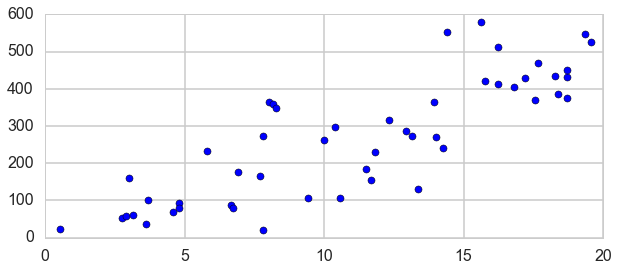

In [666]:
df = gen_regression_problem(50, 10, 75, 0, 25, mu=10, positive=True )
plot_reg(df, w=[0, 20], h=[0,600])

alpha = -9.5, beta = 24.9
Sum of Squared Residuals : 396144.87


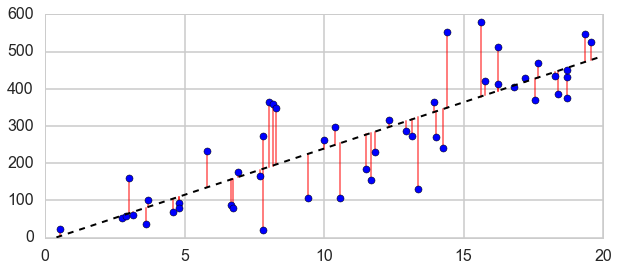

In [667]:
X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()
plot_reg(df, reg.params['const'], reg.params['X'], w=[0, 20], h=[0,600])

In [676]:
reg.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,-9.5328,29.269,-0.326,0.746,-68.382 49.316
X,24.8917,2.363,10.532,0.000,20.140 29.644


In fact, the results you get suggest that your car can run for only $24.9$ km with a liter of gasoline.
The seller was lying!

<br/><br/><br/><br/>

## Regression Problem

We are given $N$ points $(y_i, x_i)$ with $i=1,\dots N$.

We can think of those as sample draws from the the joint distribution of two random variables $X$ and $Y$.

We want to check if there is a linear relation between $X$ and $Y$.

If that is the case, we should find a non-zero $\beta$ when estimating the linear model

$$ y_i = \alpha + \beta x_i + \varepsilon_i $$

Geometrically, we can scatter our observations on the (x,y) plane. 

We can look for the line that fits the points in the best possible way. 

Then the *slope* of the line will be our estimted $\beta$, while its *intercept* will be our estimated $\alpha$.

The *best* fitting line is the one that is closer to most of the points.

More precisely, it is the line with intercept $\alpha$ and slope $\beta$ which minimizes the *sum of squared residuals*, also known as $SS_{res}$

$$ SS_{res} = \sum_{i=1}^N \varepsilon_i^2 =  \sum_{i=1}^N ( y_i - \alpha - \beta x_i )^2 $$

<br/><br/><br/><br/>

## Minimizing the sum of squared residuals

We want to minimize the sum of squared resuduals, $SS_{res}$ , as a funcion of $\alpha$ and $\beta$.

First, we impose the FOC withr respect to $\alpha$ and we get

$$ 
0 = \frac{\partial}{\partial \alpha}SS_{res} 
\implies 
\alpha = \frac{1}{N} \sum_{i=1}^N y_i - \beta \frac{1}{N} \sum_{i=1}^N x_i 
= \bar{y} - \beta \bar{x}
$$

Hence we can rewritve $SS_{res}$ as 

$$ SS_{res} = \sum_{i=1}^N \left( y_i - \bar{y} - \beta (x_i-\bar{x}) \right)^2 $$

and imposing the FOC wrt $\beta$ we find

$$ 
0 = \frac{\partial}{\partial \beta}SS_{res} 
\implies 
\beta = \frac{ \frac{1}{N} \sum_i (y_i - \bar{y})(x_i -\bar{x}) } { \frac{1}{N} \sum_i (x_i -\bar{x})^2 }
= \frac{ \hat{Cov}(X,Y) } { \hat{V}(X) }
$$

Hence we see that the optimal $\beta$ is the sample covariance of $X$ and $Y$ divided by the sample variance of the explanatory variable $X$.

<br/><br/><br/><br/>

# $R^2$

The $R^2$ or *coefficient of determination* is the proportion of the variance of $Y$ that is predictable from $X$.

In other words it measures how well $X$ can explain $Y$.

The total sum of squares $SS_{tot}$ is proportional to the sample variance of $Y$

$$ SS_{tot} = \frac{1}{N-1} \sum_{i=1}^N (y_i - \bar{y})^2 = \hat{V}(Y) $$ 

This is the variation we would like to explain using the explanatory variable $X$.

The *regression sum of squares* or *explained sum of squares* $SS_{tot}$ is proportional to the sample variance of $\beta X$

$$ SS_{reg} = \frac{1}{N-1} \sum_{i=1}^N (\beta x_i - \beta \bar{x})^2 = \hat{V}(\beta X) $$

This is the variation we can explain using the explanatory variable $X$.

The $R^2$ is defined as 
$$ R^2 = \frac{SS_{tot} - SS_{reg}}{SS_{tot}} $$

# Significance of $\beta$

The *standard error* of $\beta$ is the standard deviation of the fitted $\beta$, given $X$. 
Since $V(y_i \mid X) =  V(\varepsilon)$, we find

$$ V(\beta \mid X) 
= V\left( \frac{ \sum_i (y_i - \bar{y})(x_i -\bar{x}) } { \sum_i (x_i -\bar{x})^2 } \mid X \right)
= \frac{ V(\varepsilon) } { \sum_i (x_i -\bar{x})^2 }
= \frac{1}{(N-1)} \frac{ V(\varepsilon) } { \hat{V}(X) }
$$
Therefore the standard error of $\beta$ is given by
$$ SE(\beta) = \sqrt{ \frac{\hat{V}(\varepsilon)}{ (N-1) \hat{V}(X)} } $$

The intuition is the following:

- The standard error of $\beta$ is the ratio between the sample volatility of $\varepsilon$ and the sample volatility of $X$
- When this ratio is large, it means that *points are stacked together in a small space*
- Thus, if the $SE(\beta)$ is too large, it means that our estimate of $\beta$ is *unstable*

The *t-statistics* is defined as the ratio
$$ \frac{\beta}{SE(\beta)} $$ 
If the t-stat is far enough from zero, then we say that the estimated $\beta$ is significantly different from zero.

The threshold for significance depends on the number of explanatory variables in our linear model.

A more practical way to asses is an estimated coefficient is significantly different from zero is to look at the p-value.

It is computed from the t-stat and it (roughly) gives the probability that the estimated coefficient is non-zero even if the real coefficient is zero (false positive).

The thresholds are fixed by convention as:
- p-value $\geq 5  \% \quad \implies \quad $ not significantly different from zero
- p-value $ <   5  \% \quad \implies \quad $ weakly significant
- p-value $ <   1  \% \quad \implies \quad $ significant
- p-value $ <   0.1\% \,\,  \implies \quad $ highly significant

<br/><br/><br/><br/>

<br/><br/><br/><br/>

# Examples

## Line Fitting

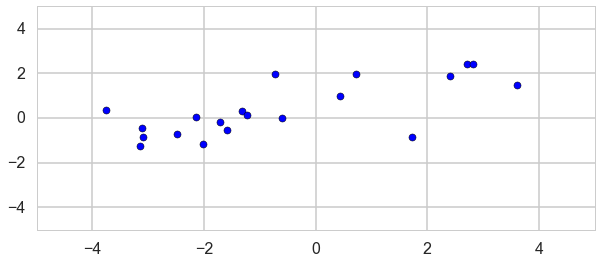

In [569]:
N  =  20
al =  1
be =  0.5
Vx =  4
Ve =  1

df  = gen_regression_problem(N, Vx, Ve, al, be )
plot_reg(df)

### First guess

alpha = 2.0, beta = -0.5
Sum of Squared Residuals : 164.64


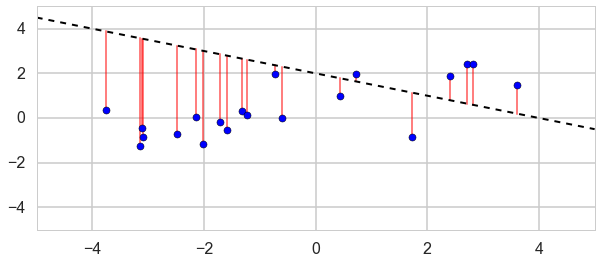

In [570]:
alpha = 2
beta  = -0.5
plot_reg(df, alpha, beta)

Not good at all! The slope of the line $\beta$ should be positive

### Second guess

alpha = 2.5, beta = 0.7
Sum of Squared Residuals : 78.26


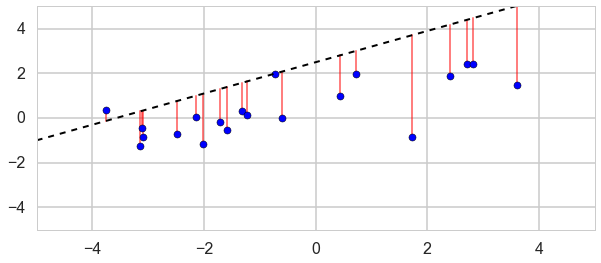

In [571]:
alpha = 2.5
beta  = 0.7
plot_reg(df, alpha, beta)

Better, but the $\alpha$ is too high

### Third guess

alpha = 1.0, beta = 0.7
Sum of Squared Residuals : 23.40


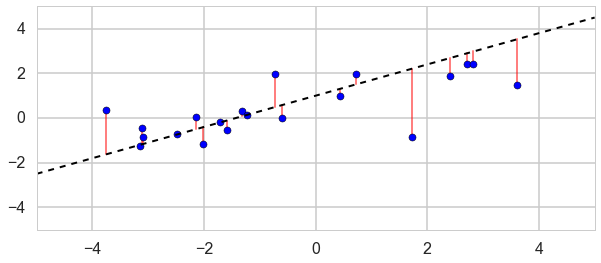

In [573]:
alpha =  1
beta  =  0.7
plot_reg(df, alpha, beta)

Not bad! But can we do better?

### Optimal $\alpha$ and $\beta$

The estimated alpha is 0.64
The estimated beta  is 0.39
alpha = 0.6, beta = 0.4
Sum of Squared Residuals : 13.55


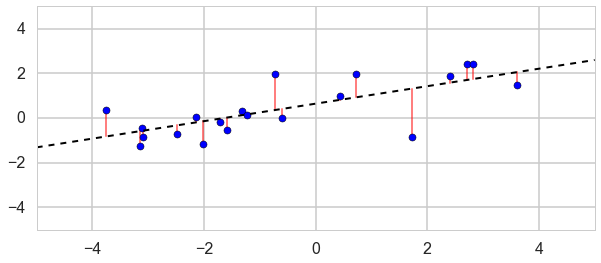

In [574]:
X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
print('The estimated alpha is {0:1.2f}'.format(alpha))
print('The estimated beta  is {0:1.2f}'.format(beta ))
plot_reg(df, alpha, beta)

<br/><br/><br/><br/>

## Coefficients

alpha = 0.3, beta = -0.9
Sum of Squared Residuals : 16.84


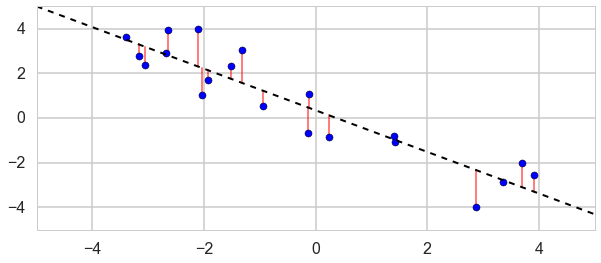

In [575]:
# Negative Beta

N  =  20
al =  0.2
be =  -1
Vx =  4
Ve =  1

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [576]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           6.78e-09
Time:                        17:51:12   Log-Likelihood:                -26.659
No. Observations:                  20   AIC:                             57.32
Df Residuals:                      18   BIC:                             59.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3444      0.219      1.569      0.134        -0.117     0.805
X             -0.9312      0.091    -10.181      0.000        -1.123    -0.739
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.758
Skew:                           0.090   Prob(JB):                        0.685
Kurtosis:                       2.063   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

alpha = -1.1, beta = 0.1
Sum of Squared Residuals : 16.80


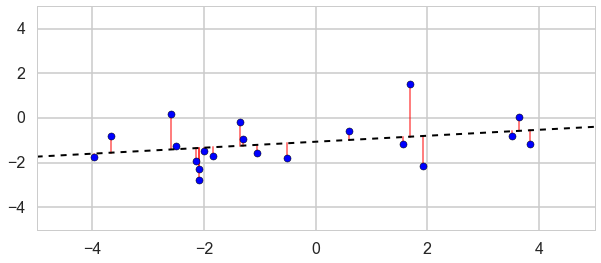

In [581]:
# Small Beta

N  =  20
al =  -1
be =  0.2
Vx =  4
Ve =  1

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [582]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.151
Date:                Tue, 01 Nov 2016   Prob (F-statistic):              0.160
Time:                        17:55:07   Log-Likelihood:                -26.638
No. Observations:                  20   AIC:                             57.28
Df Residuals:                      18   BIC:                             59.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0632      0.221     -4.808      0.000        -1.528    -0.599
X              0.1337      0.091      1.467      0.160        -0.058     0.325
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.107
Skew:                           0.770   Prob(JB):                        0.349
Kurtosis:                       3.393   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $R^2$ : Coefficient of determination

### Low $R^2$

alpha = 0.4, beta = 0.5
Sum of Squared Residuals : 665.10


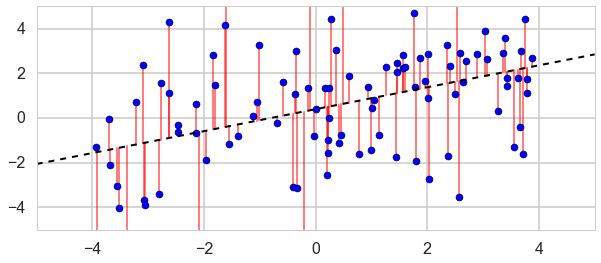

In [596]:
N  =  100
al =  0.2
be =  0.5
Vx =  4
Ve =  3

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [597]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     18.33
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           4.34e-05
Time:                        18:01:50   Log-Likelihood:                -236.63
No. Observations:                 100   AIC:                             477.3
Df Residuals:                      98   BIC:                             482.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3948      0.264      1.494      0.138        -0.130     0.919
X              0.4911      0.115      4.281      0.000         0.263     0.719
==============================================================================
Omnibus:                        1.366   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.861
Skew:                          -0.178   Prob(JB):                        0.650
Kurtosis:                       3.282   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### High $R^2$

alpha = 0.2, beta = 0.5
Sum of Squared Residuals : 22.91


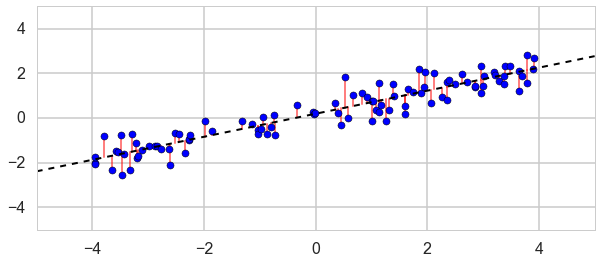

In [598]:
N  =  100
al =  0.2
be =  0.5
Vx =  4
Ve =  0.5

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [599]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     701.1
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           1.88e-46
Time:                        18:02:01   Log-Likelihood:                -68.204
No. Observations:                 100   AIC:                             140.4
Df Residuals:                      98   BIC:                             145.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1913      0.048      3.944      0.000         0.095     0.288
X              0.5160      0.019     26.479      0.000         0.477     0.555
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   2.448
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.433
Skew:                           0.139   Prob(JB):                        0.805
Kurtosis:                       2.835   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Statistical Significance

### Highly Significant $\beta$

alpha = 0.2, beta = 0.6
Sum of Squared Residuals : 152.79


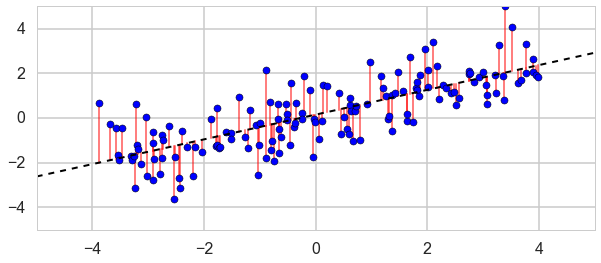

In [615]:
N  =  150
al =  0.2
be =  0.5
Vx =  4
Ve =  1

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [616]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 01 Nov 2016   Prob (F-statistic):           7.56e-31
Time:                        18:07:28   Log-Likelihood:                -214.22
No. Observations:                 150   AIC:                             432.4
Df Residuals:                     148   BIC:                             438.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1515      0.083      1.826      0.070        -0.012     0.316
X              0.5543      0.038     14.746      0.000         0.480     0.629
==============================================================================
Omnibus:                        4.340   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.002
Skew:                           0.395   Prob(JB):                        0.135
Kurtosis:                       3.122   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Not Significant $\beta$

alpha = 0.1, beta = 1.4
Sum of Squared Residuals : 196.05


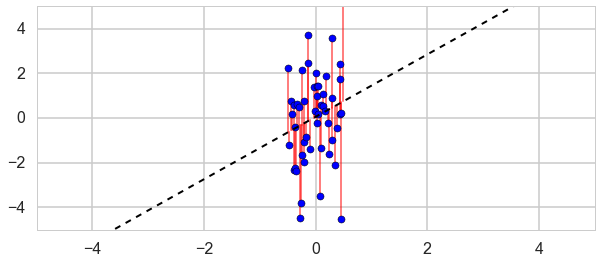

In [619]:
N  =  50
al =  0.2
be =  0.5
Vx =  0.5
Ve =  2

df  = gen_regression_problem(N, Vx, Ve, al, be )

X1  = sm.add_constant(df[['X']]) 
reg = sm.OLS( df['Y'], X1 ).fit()

alpha = reg.params['const']  # Estimated alpha
beta  = reg.params['X']      # Estimated beta
plot_reg(df, alpha, beta)

In [620]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.008
Date:                Tue, 01 Nov 2016   Prob (F-statistic):              0.163
Time:                        18:08:16   Log-Likelihood:                -105.11
No. Observations:                  50   AIC:                             214.2
Df Residuals:                      48   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0529      0.286      0.185      0.854        -0.522     0.628
X              1.3970      0.986      1.417      0.163        -0.585     3.379
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.607
Skew:                          -0.257   Prob(JB):                        0.738
Kurtosis:                       3.163   Cond. No.                         3.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""